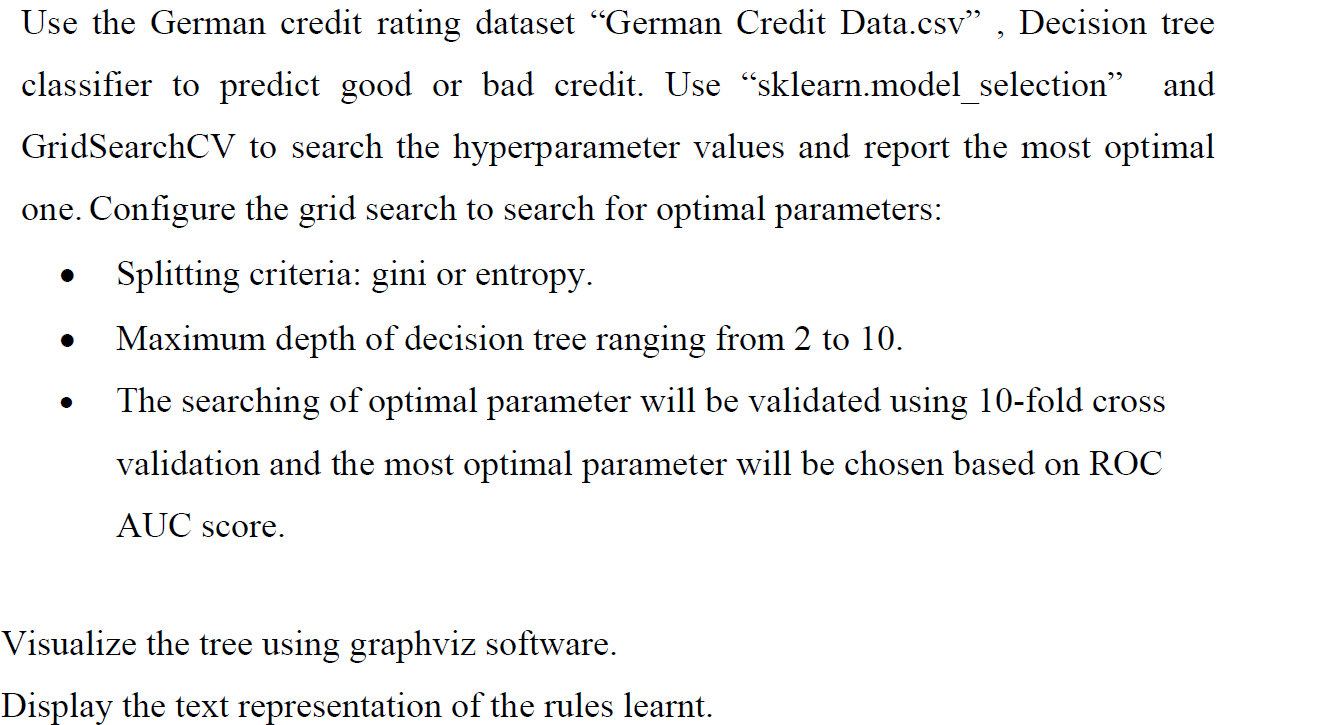

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

import graphviz

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/German Credit Data.csv')

In [ ]:
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [ ]:
"""
Using pd.get_dummies() for the categorical data, this works pretty well for this case
since the number of unique values in each categorical column is pretty low
around 5.
"""
df = pd.get_dummies(df)

In [ ]:
df.isnull().sum()

duration                 0
amount                   0
inst_rate                0
residing_since           0
age                      0
num_credits              0
status                   0
checkin_acc_A11          0
checkin_acc_A12          0
checkin_acc_A13          0
checkin_acc_A14          0
credit_history_A30       0
credit_history_A31       0
credit_history_A32       0
credit_history_A33       0
credit_history_A34       0
savings_acc_A61          0
savings_acc_A62          0
savings_acc_A63          0
savings_acc_A64          0
savings_acc_A65          0
present_emp_since_A71    0
present_emp_since_A72    0
present_emp_since_A73    0
present_emp_since_A74    0
present_emp_since_A75    0
personal_status_A91      0
personal_status_A92      0
personal_status_A93      0
personal_status_A94      0
inst_plans_A141          0
inst_plans_A142          0
inst_plans_A143          0
job_A171                 0
job_A172                 0
job_A173                 0
job_A174                 0
d

In [ ]:
"""
It should be noticed that the dataset is not balanced, this could
effect the significance of accuracy values.
"""
(df.status.value_counts() / len(df)) * 100

0    70.0
1    30.0
Name: status, dtype: float64

In [ ]:
X_cols = [x for x in df.columns if x != 'status']
y_col = ['status']
X = df[X_cols].to_numpy()
y = df[y_col].to_numpy()
print(X.shape, y.shape)

(1000, 36) (1000, 1)


In [ ]:
tree_params = {'criterion':['gini','entropy'],
               'max_depth':[x for x in range(2, 11)]}

clf = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=10, scoring='roc_auc')

clf.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc')

In [ ]:
clf.best_params_, clf.best_score_

({'criterion': 'gini', 'max_depth': 2}, 0.7088809523809524)

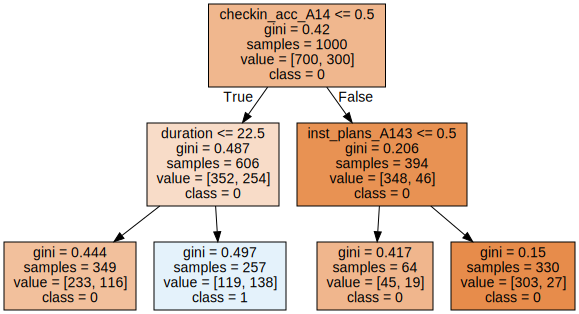

In [ ]:
dot_data = tree.export_graphviz(clf.best_estimator_, out_file=None, 
                                feature_names=X_cols,  
                                class_names=['0', '1'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
text_representation = tree.export_text(clf.best_estimator_)
print(text_representation)

|--- feature_9 <= 0.50
|   |--- feature_0 <= 22.50
|   |   |--- class: 0
|   |--- feature_0 >  22.50
|   |   |--- class: 1
|--- feature_9 >  0.50
|   |--- feature_31 <= 0.50
|   |   |--- class: 0
|   |--- feature_31 >  0.50
|   |   |--- class: 0

